       City  Temperature  Humidity  Rainfall  Days
0    Tehran           40        53        50     1
1    Tehran           23        77        17     2
2    Tehran           40        39        15     3
3    Tehran           22        24        20     4
4    Tehran           22        72        47     5
..      ...          ...       ...       ...   ...
175   Ahvaz           18        72         1    26
176   Ahvaz           38        73         4    27
177   Ahvaz           37        54        32    28
178   Ahvaz           23        45        30    29
179   Ahvaz           36        53        39    30

[180 rows x 5 columns]
        Temperature           Humidity           Rainfall        
               mean min max       mean min max       mean min max
City                                                             
Ahvaz     27.900000  16  40  48.433333  22  76  23.433333   1  44
Isfahan   28.000000  16  38  54.133333  25  80  30.900000   6  48
Mashhad   28.000000  16  40  50.73

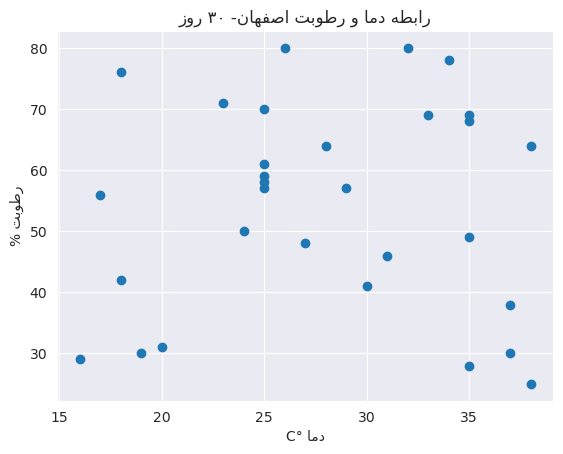

In [1]:
import arabic_reshaper
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import bidi.algorithm
import seaborn as sns


def text_farsi(x):
    x = arabic_reshaper.reshape(x)
    x = bidi.algorithm.get_display(x)
    return x

# 1
cities = np.array(['Tehran', 'Mashhad', 'Isfahan', 'Tabriz', 'Shiraz', 'Ahvaz'])
temp = np.random.randint(15, 41, (6, 30)) # Degree
humidity = np.random.randint(20, 81, (6, 30)) # Percent
rainfall = np.random.randint(0, 51, (6, 30)) # Millimeter
days = np.arange(1, 31)
# 2
cities_weather = {
    'City': np.repeat(cities, len(days)),
    'Temperature': temp.flatten(),
    'Humidity': humidity.flatten(),
    'Rainfall': rainfall.flatten(),
    'Days': np.tile(days, len(cities)),
}
cities_weather_df = pd.DataFrame(cities_weather)
print(cities_weather_df)
grouped_df = cities_weather_df.groupby('City')
print(grouped_df[ ['Temperature', 'Humidity', 'Rainfall'] ].agg(['mean', 'min', 'max']))
# print(cities_weather_df[ cities_weather_df.apply(lambda x: x['Temperature'] == x['Temperature'].max()) ])
print(cities_weather_df[ cities_weather_df['Temperature'] == cities_weather_df['Temperature'].values.max() ][ ['City', 'Temperature'] ], end='\n\n')
print(cities_weather_df[ cities_weather_df['Temperature'] == cities_weather_df['Temperature'].values.min() ][ ['City', 'Temperature'] ], end='\n\n')
# 3
print('rainfall count:\n', cities_weather_df.groupby('City')['Rainfall'].apply(lambda x: (x > 10).sum()), end='\n\n')
print('rainfall count:\n', cities_weather_df[cities_weather_df['Rainfall'] > 10].groupby('City').size(), end='\n\n')

# 4
fig, ax = plt.subplots()
ax.scatter(cities_weather_df.loc[ cities_weather_df.City == 'Isfahan', 'Temperature' ].values, cities_weather_df.loc[ cities_weather_df.City == 'Isfahan', 'Humidity' ].values)
ax.set_title(text_farsi("رابطه دما و رطوبت اصفهان- ۳۰ روز"))
ax.set_xlabel(text_farsi("دما °C"))
ax.set_ylabel(text_farsi("رطوبت %"));



First 5 row diabetes df:
    Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0            6    148.0           72.0       35.00000  155.548223  33.6   
1            1     85.0           66.0       29.00000  155.548223  26.6   
2            8    183.0           64.0       29.15342  155.548223  23.3   
3            1     89.0           66.0       23.00000   94.000000  28.1   
4            0    137.0           40.0       35.00000  168.000000  43.1   

   DiabetesPedigree  Age  Outcome  
0             0.627   50        1  
1             0.351   31        0  
2             0.672   32        1  
3             0.167   21        0  
4             2.288   33        1  

correlation:
                 Glucose  BloodPressure       BMI       Age   Insulin   Outcome
Glucose        1.000000       0.218367  0.230941  0.266534  0.420157  0.492928
BloodPressure  0.218367       1.000000  0.281268  0.324595  0.072517  0.166074
BMI            0.230941       0.281268  1.000000  0.025

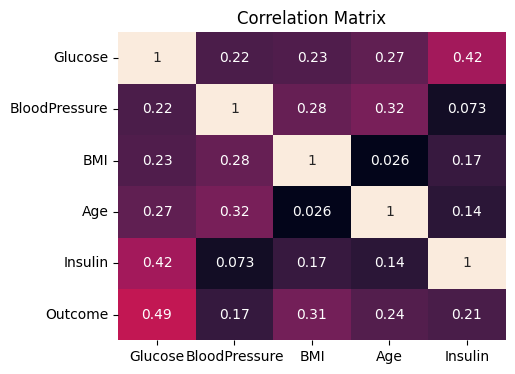

In [58]:
diabetes_df = pd.read_csv('diabetes.csv')

diabetes_df.apply(lambda col: col.fillna(col.mean(), inplace=True))

print('First 5 row diabetes df:\n', diabetes_df.head(), end='\n\n')

df_corr = diabetes_df[ ['Glucose', 'BloodPressure', 'BMI', 'Age', 'Insulin', 'Outcome'] ].corr()
print('correlation:\n', df_corr, end='\n\n')
print(50 * '*')

df_corr.drop('Outcome', axis=1, inplace=True)
df_corr_copy = df_corr.abs().copy()
np.fill_diagonal(df_corr_copy.values, np.nan)

max_corr_feature = df_corr_copy.stack().idxmax()
print('max corr feature: ', max_corr_feature[0])

max_corr_feature_value = df_corr_copy.stack().max()
print(f'max corr feature value: {max_corr_feature_value:.4f}')

plt.figure(figsize=(5, 4))
sns.heatmap(df_corr, annot=True, cbar=False)
plt.title('Correlation Matrix');

